# Day 08. Exercise 05
# Clustering

## 0. Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


In [4]:
df.drop('pageviews', axis=1, inplace=True)

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

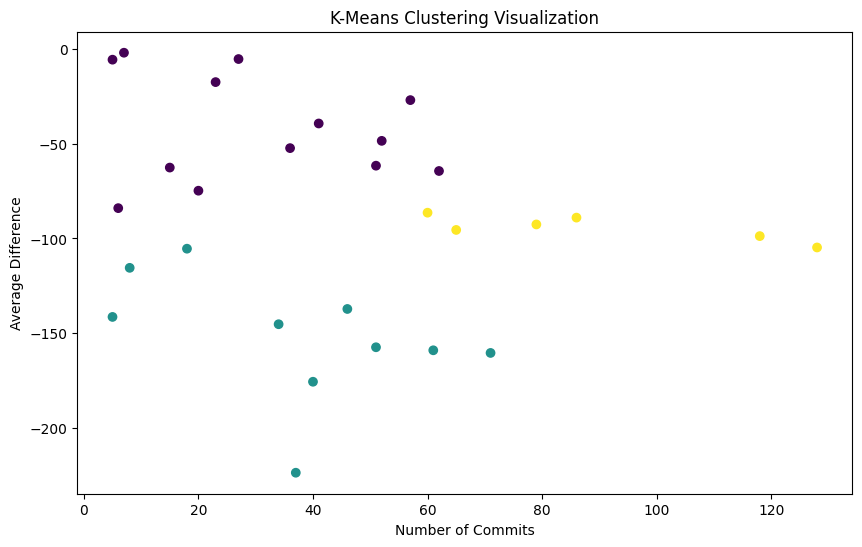

In [7]:
X = df.drop('uid', axis=1)

kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('K-Means Clustering Visualization')
plt.show()

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=21)
    kmeans.fit(X)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_score(X, kmeans.labels_)}")


For n_clusters = 2, The average silhouette_score is : 0.4194920562377423
For n_clusters = 3, The average silhouette_score is : 0.4454402135233297
For n_clusters = 4, The average silhouette_score is : 0.41503879936268956
For n_clusters = 5, The average silhouette_score is : 0.3521030626149593
For n_clusters = 6, The average silhouette_score is : 0.3954350435152892


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

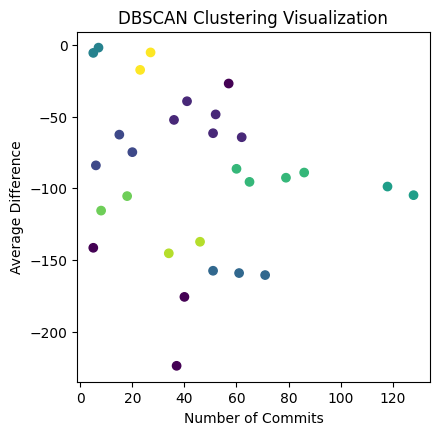

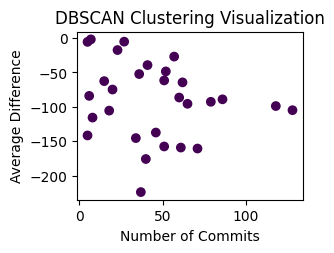

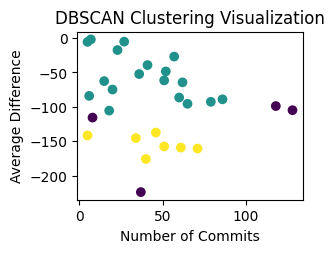

In [22]:

plt.figure(figsize=(10, 10))

dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(X)

plt.subplot(2, 2, 1)
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('DBSCAN Clustering Visualization')
plt.show()

dbscan = DBSCAN(eps=10, min_samples=3)
dbscan.fit(X)

plt.subplot(2, 2, 2)
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('DBSCAN Clustering Visualization')
plt.show()

dbscan = DBSCAN(eps=30, min_samples=4)
dbscan.fit(X)

plt.subplot(2, 2, 3)
plt.scatter(X['num_commits'], X['AVG(diff)'], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('DBSCAN Clustering Visualization')
plt.show()

In [23]:
silhouette_score(X, dbscan.labels_)

0.37939165508577244

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

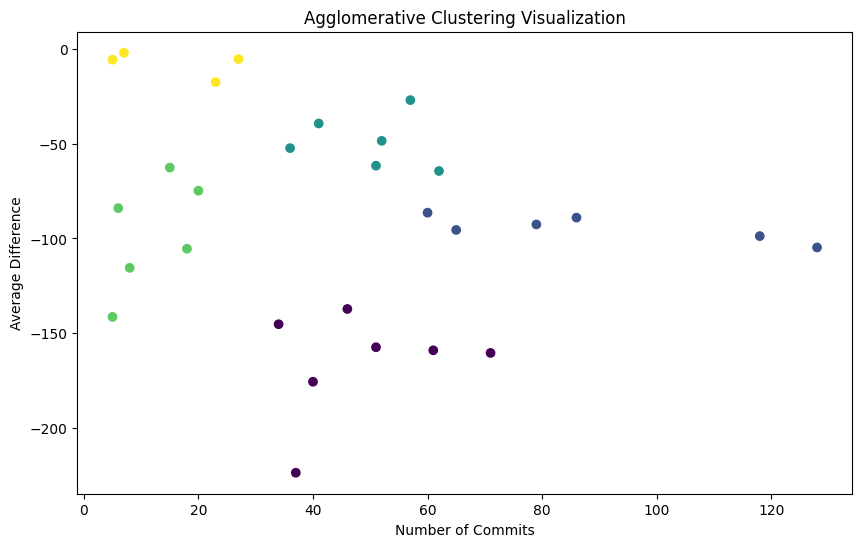

In [28]:
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=ac.labels_, cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('Agglomerative Clustering Visualization')
plt.show()

In [29]:
n_clusters_values = range(2, 10)

for n_clusters in n_clusters_values:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    ac.fit(X)
    print(f"For n_clusters={n_clusters}, The silhouette_score is : {silhouette_score(X, ac.labels_)}")

For n_clusters=2, The silhouette_score is : 0.35902490572221984
For n_clusters=3, The silhouette_score is : 0.3390493703444805
For n_clusters=4, The silhouette_score is : 0.4448362750283643
For n_clusters=5, The silhouette_score is : 0.46383015199381467
For n_clusters=6, The silhouette_score is : 0.4527145606287827
For n_clusters=7, The silhouette_score is : 0.4865808853184314
For n_clusters=8, The silhouette_score is : 0.50779855565622
For n_clusters=9, The silhouette_score is : 0.47576869039147557


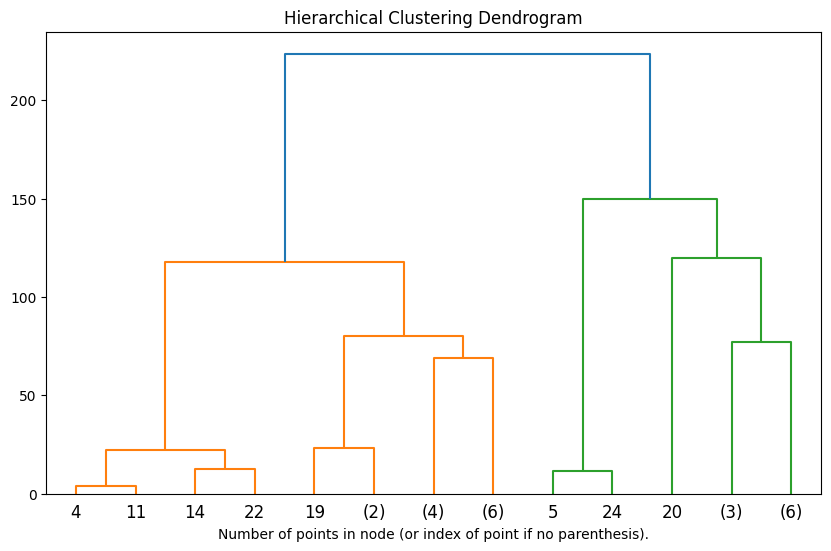

In [32]:
linkage_matrix = linkage(X, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

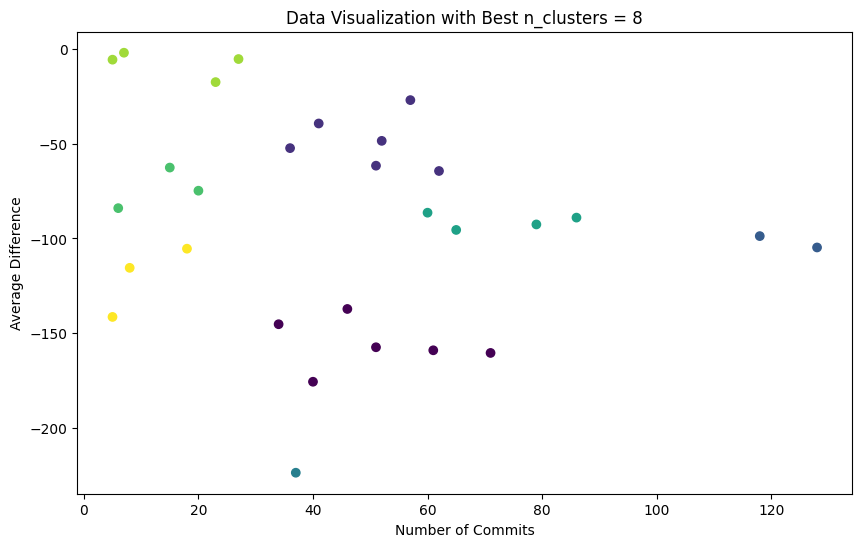

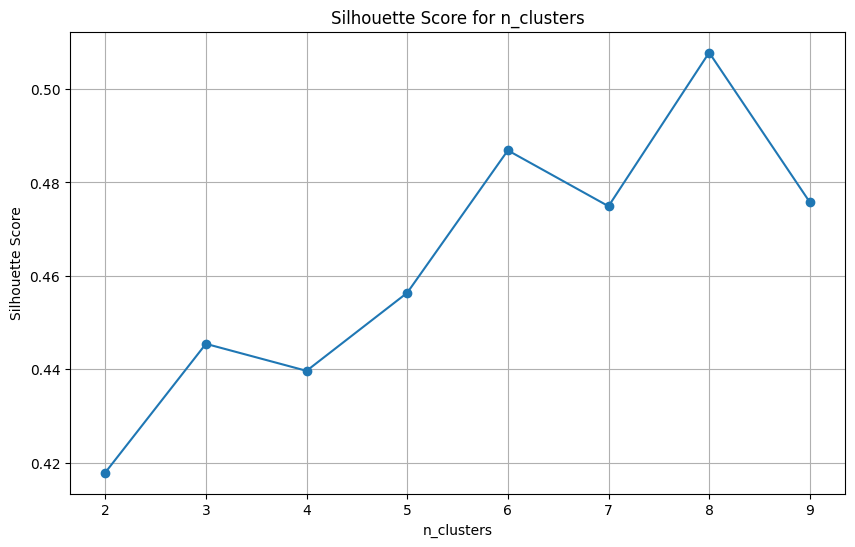

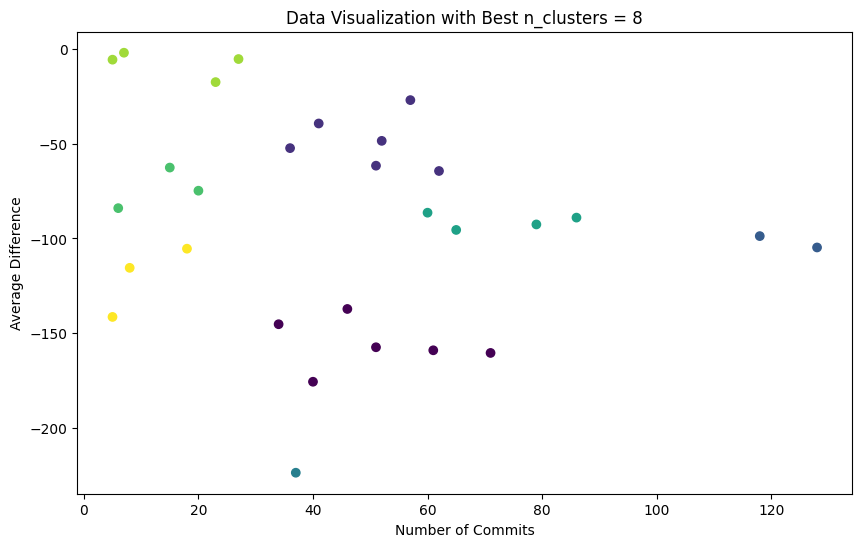

In [37]:
def optimize_clustering(model_class, model_params, param_name, param_range, data):
    silhouette_scores = []
    
    for param_value in param_range:
        model_params[param_name] = param_value
        model = model_class(**model_params)
        model.fit(data)
        score = silhouette_score(data, model.labels_)
        silhouette_scores.append(score)
    
    best_index = np.argmax(silhouette_scores)
    best_param_value = param_range[best_index]
    model_params[param_name] = best_param_value
    best_model = model_class(**model_params)
    best_model.fit(data)
    
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Score for {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=best_model.labels_, cmap='viridis')
    plt.title(f'Data Visualization with Best {param_name} = {best_param_value}')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    
    return plt.gcf()

model_class = KMeans
model_params = {'n_clusters': 3, 'random_state': 42}
param_name = 'n_clusters'
param_range = range(2, 10)

optimize_clustering(model_class, model_params, param_name, param_range, X.to_numpy())